<a href="https://colab.research.google.com/github/kajigod/Diplomado-Modulo-ll/blob/main/data%20social%20media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de productividad y uso de redes sociales**

El análisis de datos sobre hábitos digitales y productividad laboral implica manejar múltiples variables continuas, como tiempo de uso de redes sociales, notificaciones recibidas, horas de trabajo y sueño, niveles de estrés, productividad percibida y real, entre otras. Dada la alta dimensionalidad y la posible correlación entre estas variables, resulta crucial aplicar técnicas que permitan reducir la complejidad y descubrir patrones ocultos en los datos.

En este proyecto se utilizan dos técnicas complementarias:

**Análisis de Componentes Principales (PCA)**

* PCA permite reducir la dimensionalidad del dataset transformando las variables originales en un conjunto de componentes principales no correlacionadas.

* Estas nuevas dimensiones resumen la mayor parte de la información del dataset, facilitando la visualización y la interpretación de relaciones complejas entre variables como productividad, uso de redes sociales y bienestar digital.

* Por ejemplo, PCA ayuda a identificar combinaciones de variables que representan “intensidad de uso digital” o “equilibrio entre trabajo y descanso”.

**Clustering (K-Means)**

* Clustering es una técnica de segmentación no supervisada que agrupa individuos con patrones de comportamiento similares.

* Aplicando K-Means sobre los componentes principales obtenidos con PCA, es posible identificar perfiles de usuarios, como grupos con alta productividad y bajo estrés frente a grupos con alta exposición digital y bajo bienestar laboral.

* Esta técnica permite generar insights prácticos para diseñar estrategias de bienestar digital y gestión de productividad, sin necesidad de etiquetas predefinidas.

En conjunto, PCA y clustering proporcionan un flujo analítico robusto: primero se simplifica y organiza la información con PCA, luego se identifican grupos naturales de individuos mediante clustering. Esto facilita la interpretación de patrones complejos y la toma de decisiones basada en datos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/modulo 6/social_media_vs_productivity.csv")

print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include="all"))


Dimensiones: (30000, 19)

Primeras filas:


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_dur

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,30000,30000,27235.000000,30000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000,30000,30000.000000,30000.000000,30000.000000,27270.000000
unique,NaN,3,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,Male,Education,NaN,TikTok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
freq,NaN,14452,5055,NaN,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20979,22602,NaN,NaN,NaN,NaN
mean,41.486867,NaN,NaN,3.113418,NaN,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,NaN,NaN,1.999300,15.557067,10.360655,4.964901
std,13.835221,NaN,NaN,2.074813,NaN,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,NaN,NaN,1.410047,9.252956,7.280415,2.121194
min,18.000000,NaN,NaN,0.000000,NaN,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,1.639566,NaN,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,NaN,NaN,1.000000,8.000000,4.541872,3.363580
50%,41.000000,NaN,NaN,3.025913,NaN,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,NaN,NaN,2.000000,16.000000,10.013677,4.951049
75%,53.000000,NaN,NaN,4.368917,NaN,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,NaN,NaN,3.000000,24.000000,15.300809,6.581323


In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64


In [ ]:
df_clean = df.dropna()

print("Valores nulos por columna:")
print(df_clean.isnull().sum())

Valores nulos por columna:
age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


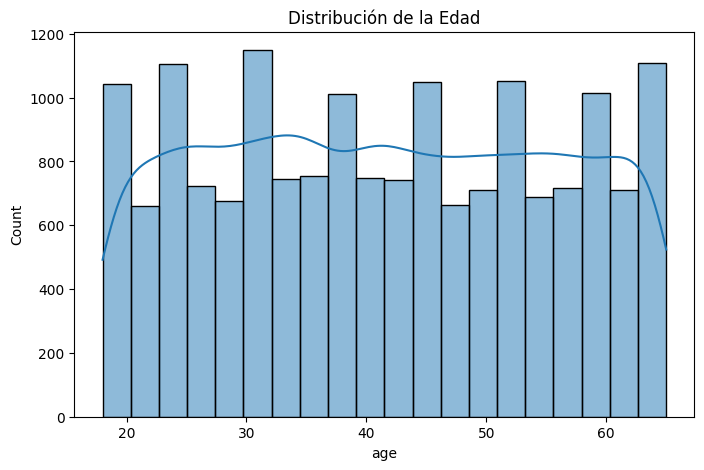

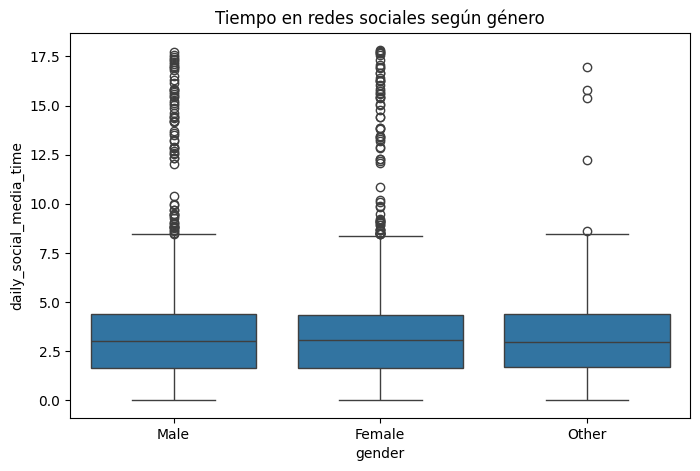

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["age"], bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="daily_social_media_time", data=df_clean)
plt.title("Tiempo en redes sociales según género")
plt.show()

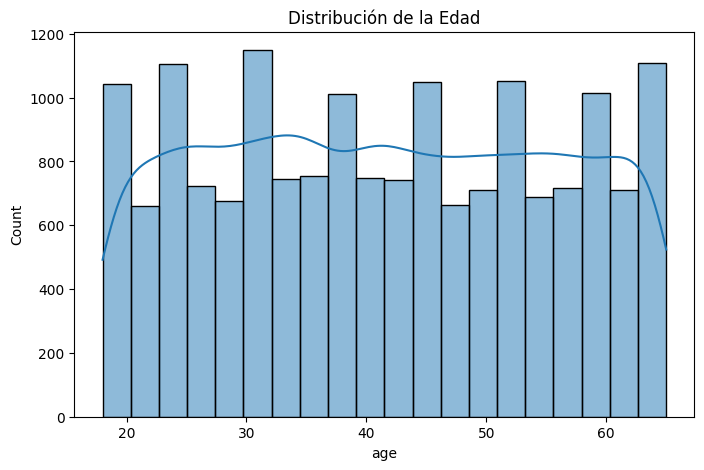

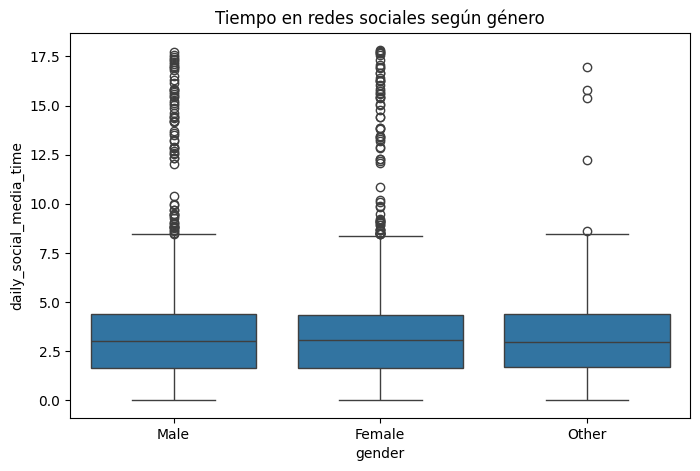

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["age"], bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="daily_social_media_time", data=df_clean)
plt.title("Tiempo en redes sociales según género")
plt.show()

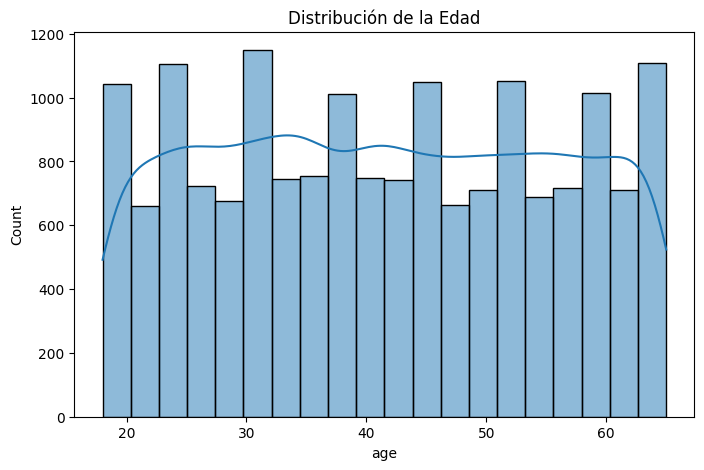

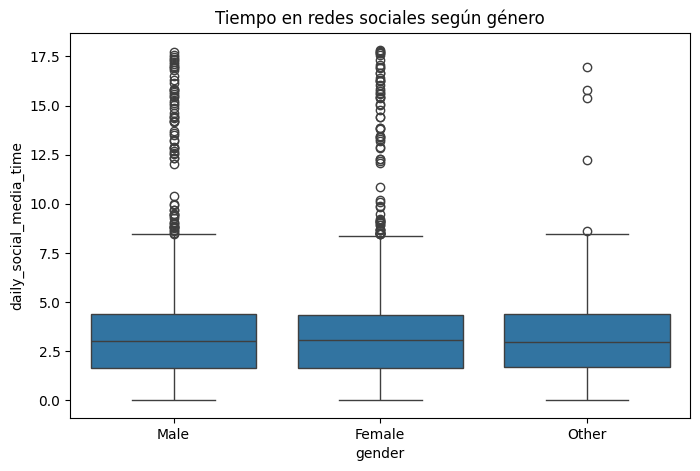

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["age"], bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="daily_social_media_time", data=df_clean)
plt.title("Tiempo en redes sociales según género")
plt.show()

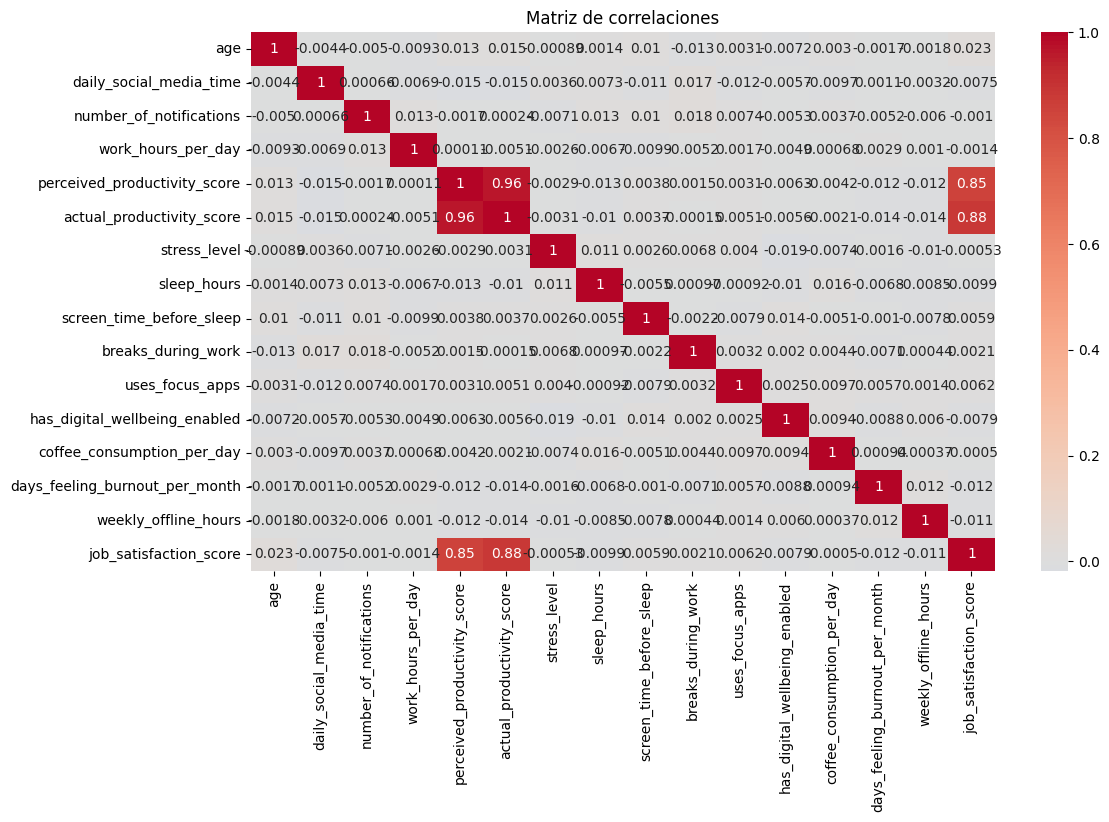

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones")
plt.show()

In [ ]:
# Matriz de correlación redondeada a 2 decimales
corr_matrix = df_clean.corr(numeric_only=True).round(2)

# Mostrar como tabla
display(corr_matrix)

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
age,1.00,-0.00,-0.00,-0.01,0.01,0.02,-0.00,0.00,0.01,-0.01,0.00,-0.01,0.00,-0.00,-0.00,0.02
daily_social_media_time,-0.00,1.00,0.00,-0.01,-0.02,-0.01,0.00,0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.00,-0.01
number_of_notifications,-0.00,0.00,1.00,0.01,-0.00,0.00,-0.01,0.01,0.01,0.02,0.01,-0.01,0.00,-0.01,-0.01,-0.00
work_hours_per_day,-0.01,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.01,-0.01,0.00,-0.00,0.00,0.00,0.00,-0.00
perceived_productivity_score,0.01,-0.02,-0.00,0.00,1.00,0.96,-0.00,-0.01,0.00,0.00,0.00,-0.01,-0.00,-0.01,-0.01,0.85
actual_productivity_score,0.02,-0.01,0.00,-0.01,0.96,1.00,-0.00,-0.01,0.00,-0.00,0.01,-0.01,-0.00,-0.01,-0.01,0.88
stress_level,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,1.00,0.01,0.00,0.01,0.00,-0.02,-0.01,-0.00,-0.01,-0.00
sleep_hours,0.00,0.01,0.01,-0.01,-0.01,-0.01,0.01,1.00,-0.01,0.00,-0.00,-0.01,0.02,-0.01,-0.01,-0.01
screen_time_before_sleep,0.01,-0.01,0.01,-0.01,0.00,0.00,0.00,-0.01,1.00,-0.00,-0.01,0.01,-0.01,-0.00,-0.01,0.01
breaks_during_work,-0.01,0.02,0.02,-0.01,0.00,-0.00,0.01,0.00,-0.00,1.00,0.00,0.00,0.00,-0.01,0.00,0.00


In [ ]:
# Matriz de correlación redondeada
corr_matrix = df_clean.corr(numeric_only=True).round(2)

# Mostrar como tabla con gradiente de colores
corr_matrix.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)


,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
age,1.00,-0.00,-0.00,-0.01,0.01,0.02,-0.00,0.00,0.01,-0.01,0.00,-0.01,0.00,-0.00,-0.00,0.02
daily_social_media_time,-0.00,1.00,0.00,-0.01,-0.02,-0.01,0.00,0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.00,-0.01
number_of_notifications,-0.00,0.00,1.00,0.01,-0.00,0.00,-0.01,0.01,0.01,0.02,0.01,-0.01,0.00,-0.01,-0.01,-0.00
work_hours_per_day,-0.01,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.01,-0.01,0.00,-0.00,0.00,0.00,0.00,-0.00
perceived_productivity_score,0.01,-0.02,-0.00,0.00,1.00,0.96,-0.00,-0.01,0.00,0.00,0.00,-0.01,-0.00,-0.01,-0.01,0.85
actual_productivity_score,0.02,-0.01,0.00,-0.01,0.96,1.00,-0.00,-0.01,0.00,-0.00,0.01,-0.01,-0.00,-0.01,-0.01,0.88
stress_level,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,1.00,0.01,0.00,0.01,0.00,-0.02,-0.01,-0.00,-0.01,-0.00
sleep_hours,0.00,0.01,0.01,-0.01,-0.01,-0.01,0.01,1.00,-0.01,0.00,-0.00,-0.01,0.02,-0.01,-0.01,-0.01
screen_time_before_sleep,0.01,-0.01,0.01,-0.01,0.00,0.00,0.00,-0.01,1.00,-0.00,-0.01,0.01,-0.01,-0.00,-0.01,0.01
breaks_during_work,-0.01,0.02,0.02,-0.01,0.00,-0.00,0.01,0.00,-0.00,1.00,0.00,0.00,0.00,-0.01,0.00,0.00


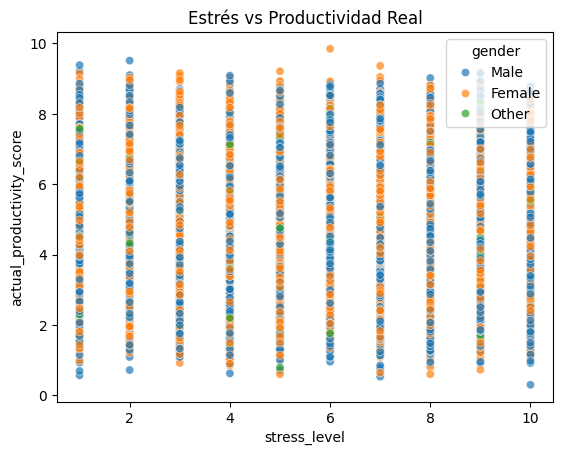

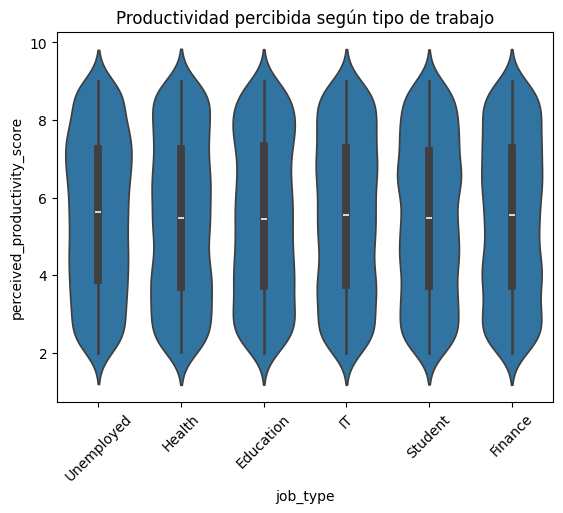

In [ ]:
sns.scatterplot(x="stress_level", y="actual_productivity_score",
                hue="gender", data=df_clean, alpha=0.7)
plt.title("Estrés vs Productividad Real")
plt.show()

sns.violinplot(x="job_type", y="perceived_productivity_score", data=df_clean)
plt.xticks(rotation=45)
plt.title("Productividad percibida según tipo de trabajo")
plt.show()


In [ ]:
# Seleccionar solo columnas numéricas
X = df_clean.select_dtypes(include=[np.number])

print("Variables numéricas usadas en el PCA:", X.columns.tolist())

Variables numéricas usadas en el PCA: ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Mantener todas las componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_

print("Varianza explicada por cada componente:")
print(explained_variance)


Varianza explicada por cada componente:
[0.20021571 0.07435458 0.07340711 0.07299203 0.07244903 0.07187003
 0.07123621 0.07089656 0.07043618 0.07019626 0.06928209 0.06849488
 0.01183377 0.00233557]


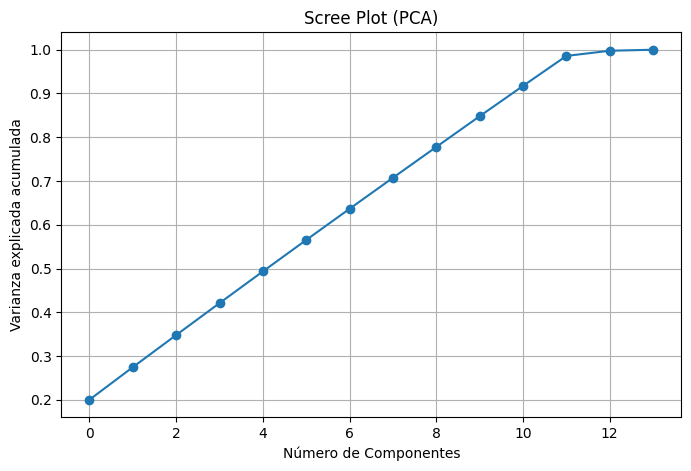

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker="o")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Scree Plot (PCA)")
plt.grid(True)
plt.show()


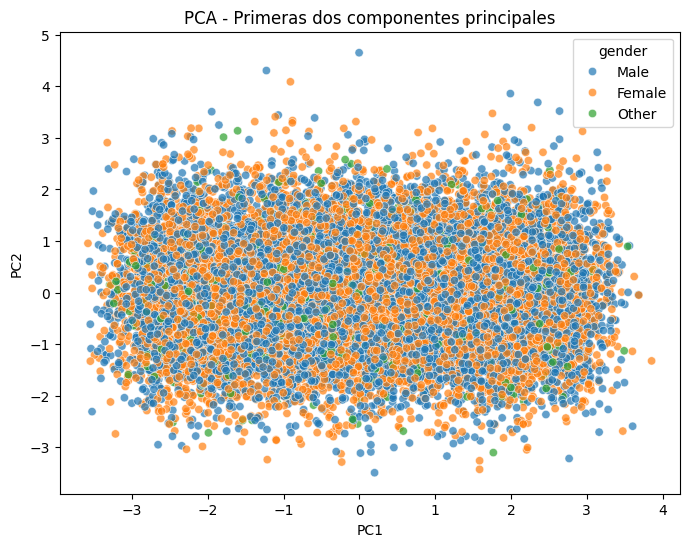

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_clean["gender"], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Primeras dos componentes principales")
plt.show()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(X.columns))],
    index=X.columns
)

print("Pesos de cada variable en las componentes:")
display(loadings)


Pesos de cada variable en las componentes:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
age,0.016476,-0.200669,0.482217,0.051778,0.139356,-0.223342,-0.077424,0.439531,0.462079,-0.452814,-0.171179,-0.088468,-0.008721,-0.000181
daily_social_media_time,-0.012163,0.346448,-0.187011,-0.478468,0.086457,-0.183725,-0.085419,0.512696,-0.079473,-0.088141,0.493942,0.215468,-0.006985,0.000359
number_of_notifications,-0.000829,0.410704,-0.094695,0.462849,-0.338815,-0.153908,0.150453,0.274613,0.161164,0.161590,-0.289550,0.485455,0.000105,-0.001513
work_hours_per_day,-0.002115,-0.047970,-0.388483,0.359613,-0.189145,0.535308,0.064647,0.238905,0.247007,-0.275652,0.343386,-0.280967,-0.000590,0.003881
perceived_productivity_score,0.580899,0.001328,-0.013806,-0.002464,0.003361,0.002165,0.007327,-0.001436,-0.002674,0.008627,0.003640,-0.000630,-0.491454,-0.648586
actual_productivity_score,0.587186,0.003812,-0.009226,-0.001953,0.006389,-0.000045,0.006570,-0.000255,-0.004157,0.010225,0.002158,0.002065,-0.298171,0.752322
stress_level,-0.002103,0.225075,0.241726,-0.359591,0.025416,0.427205,0.489162,-0.294978,0.348139,-0.169825,0.016978,0.319097,-0.002298,0.000367
sleep_hours,-0.010379,0.419433,0.226278,0.157144,0.470366,0.109926,0.173811,0.182570,0.114448,0.497578,0.039377,-0.434701,-0.001179,-0.001803
screen_time_before_sleep,0.004548,-0.050538,0.455299,0.132938,-0.509812,-0.278681,0.299955,-0.088497,-0.091188,0.100558,0.540411,-0.163107,-0.002283,0.000420
breaks_during_work,0.000866,0.509486,-0.242685,-0.104803,-0.154485,-0.364712,0.061988,-0.295079,0.102042,-0.392647,-0.190547,-0.471013,-0.001231,0.001396


In [ ]:
explained_var = pca.explained_variance_ratio_
print(explained_var)
print("Varianza acumulada:", np.cumsum(explained_var))


[0.20021571 0.07435458 0.07340711 0.07299203 0.07244903 0.07187003
 0.07123621 0.07089656 0.07043618 0.07019626 0.06928209 0.06849488
 0.01183377 0.00233557]
Varianza acumulada: [0.20021571 0.27457028 0.34797739 0.42096942 0.49341845 0.56528848
 0.63652469 0.70742125 0.77785743 0.84805369 0.91733579 0.98583066
 0.99766443 1.        ]


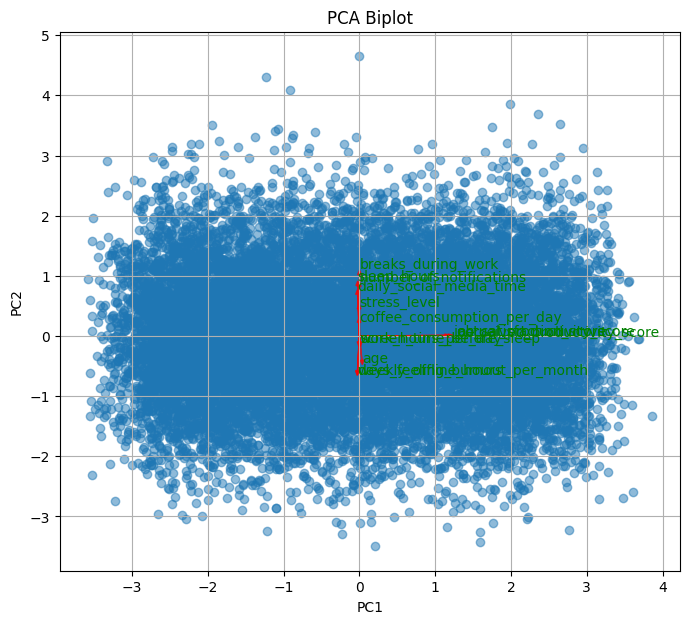

In [ ]:
import matplotlib.pyplot as plt

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    plt.figure(figsize=(8,7))
    plt.scatter(xs, ys, alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2, coeff[i,1]*2,
                  color='r', alpha=0.7, head_width=0.05)
        if labels is None:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, "Var"+str(i+1), color='g')
        else:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, labels[i], color='g')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid()
    plt.show()

# Usar el biplot con tus datos
biplot(X_pca, pca.components_.T, labels=X.columns)


In [ ]:
# 1. Selección de variables numéricas y estandarización
X = df_clean.select_dtypes(include="number")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA (reducimos a 2 componentes principales para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por los 2 componentes principales:", pca.explained_variance_ratio_)

Varianza explicada por los 2 componentes principales: [0.20021571 0.07435458]


In [ ]:
# 3. K-Means clustering (ejemplo con 3 clusters, puedes ajustar k)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Añadir clusters al dataframe
df_clean.loc[:, "Cluster"] = clusters


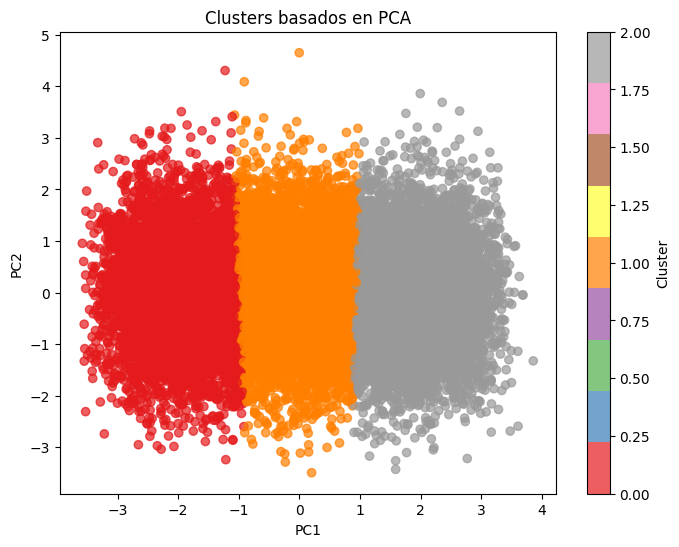

In [ ]:
# 4. Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="Set1", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters basados en PCA")
plt.colorbar(label="Cluster")
plt.show()